In [1]:
#### libs
from numpy import *
import matplotlib.pyplot as plt

#### local
from rbconsts import *
from physconsts import *
from amophys import *

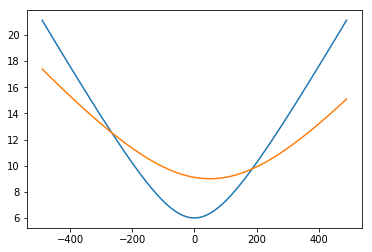

In [24]:
wx = 6e-6
wy = 9e-6
l = 7.8e-7
z_offset = 5e-5
wzx = lambda z: wx*sqrt(1+z**2/zRx**2) # waist w(z)
wzy = lambda z: wy*sqrt(1+(z-z_offset)**2/zRy**2) # waist w(z)
zRy = z_rayleigh(l,wy)
zpts = linspace(-1.5*zRy,1.5*zRy,100)
wxpts = [wzx(z)*1e6 for z in zpts]
wypts = [wzy(z)*1e6 for z in zpts]
plt.plot(zpts*1e6,wxpts)
plt.plot(zpts*1e6,wypts)
plt.show()

In [25]:
def intensity(x,y,z,lmbda,wx,I0,wy=None,z_offset=0):
    if wy is None:
        wy = wx
        
    zRx = z_rayleigh(lmbda,wx)
    zRy = z_rayleigh(lmbda,wy)

    wzx = (1+(z/zRx)**2)
    wzy = (1+(z/zRy)**2)
    return I0*exp(-2*x**2/(wzx*(wx**2*wzx))-2*y**2/(wzy*(wy**2*wzy)))

u = lambda x,y,z: intensity(x,y,z,l,wx,I0,wy=wy)  

6e-06 8e-06 7.8e-07


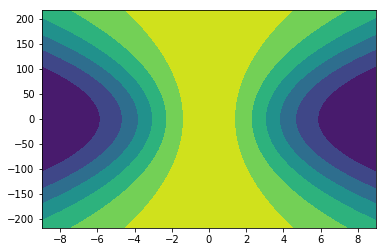

In [16]:
xpts = linspace(-3*wx,3*wx,100)
ypts = linspace(-3*wx,3*wx,100)
mu = 1e-6

zRx = z_rayleigh(l,wx)
zRy = z_rayleigh(l,wy)

s = 1.5 # units waist or rayleigh length
xpts = linspace(-s*wx,s*wx,100)
zpts = linspace(-s*zRx,s*zRx,100)
xx,zz = meshgrid(xpts,zpts)
fpts = u(xx,0,zz) # the fort intensity eval'd on the meshgrid
plt.contourf(xpts/mu,zpts/mu,fpts)

6e-06 8e-06 7.8e-07


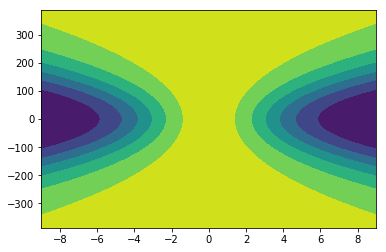

In [17]:
xpts = linspace(-3*wx,3*wx,100)
ypts = linspace(-3*wx,3*wx,100)
mu = 1e-6

zRx = z_rayleigh(l,wx)
zRy = z_rayleigh(l,wy)

s = 1.5 # units waist or rayleigh length
xpts = linspace(-s*wx,s*wx,100)
zpts = linspace(-s*zRy,s*zRy,100)
xx,zz = meshgrid(xpts,zpts)
fpts = u(xx,0,zz) # the fort intensity eval'd on the meshgrid
plt.contourf(xpts/mu,zpts/mu,fpts)

In [5]:
help(dipole_trap)

Help on class dipole_trap in module amophys:

class dipole_trap(builtins.object)
 |  dipole_trap(lmbda, wx, Tdepth, Tatom, wy=None)
 |  
 |  Methods defined here:
 |  
 |  U(self, x, y, z)
 |      the potential energy as a function of space in the dipole trap.
 |      ASTIGMATISM not correctly represented!!
 |  
 |  __init__(self, lmbda, wx, Tdepth, Tatom, wy=None)
 |      A dipole trap object with the beams potential and distribution of 
 |      atoms specified by Tatom. 
 |      'wx': x beam waist in focal plane (z=0)
 |      'wy': Assumed equal to wx by default
 |      'Tdepth'
 |      'Tatom'
 |  
 |  curvefit(self, tdata, rdata)
 |      For using the release_recap procedure to fit real data.
 |      
 |      tdata: time pts from data
 |      rdata: retention pts data
 |  
 |  distplot(self, events)
 |      show atoms in FORT in z = 0 plane before drop and recapture
 |  
 |  drop_recap(self, tlist, T=None, events=None, base_retention=None, progress=False)
 |      Procedure for simu